In [2]:
import pandas as pd
import numpy as np
import hics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm

1_wHiCS: 10 datasets, each 100 independent features, 40 of them useful  
2_wRar: 10 datasets, each 30 independent features, 20 of them useful, 70 dependent features

In [3]:
import arff
datas = []
for i in range(1, 11):
    file = open('../data/2_wrar/2_wrar_' + str(i) + '.arff', 'r')
    dataset = arff.load(file)
    data = pd.DataFrame(dataset['data'])
    data[100] = data[100].astype(np.float32)
    data.rename(columns=lambda c: str(c), inplace=True)
    datas.append(data)
target = str(100)

In [ ]:
# Artificially imbalance dataset
class0 = data.loc[data[target] == 0]
class1 = data.loc[data[target] == 1]
imb_data = pd.concat([class1.sample(frac=0.02), class0]).reset_index(drop=True)
# For perfectly balanced dataset, this will result in a 97.56:2.44 ratio

## Ground truth

In [ ]:
# For test7.arff
weights = [0.5335601544927123, 0.759839177764759, 0.772151052808685, 0.7625265610410171,
           0.5612073314384326, 0.34594353279215817, 0.26778115186982904, 0.05104168604756121,
           0.24539066769327755, 0.4298986108981449, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=input_features, index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
# For test8.arff
weights = [0.5335601544927123, 0.759839177764759, 0.772151052808685, 0.7625265610410171,
           0.5612073314384326, 0.34594353279215817, 0.26778115186982904, 0.05104168604756121,
           0.24539066769327755, 0.4298986108981449, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=data.columns[:20], index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
# For test9.arff
weights = [0.7168886878437233, 0.1650913157879492, 0.7017219042598103, 0.5371651431980248,
           0.4012494719087343, 0.08997742462568355, 0.4133240085774441, 0.3003377473503873,
           0.12858013417222078, 0.5857996257919974, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=data.columns[:20], index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
# For test10.arff
weights = [0.2673055187472877, 0.196159223714542, 0.701161636883324, 0.765385125610722,
           0.0011260947105074194, 0.22801651296579062, 0.8949526553930152, 0.13072480437597472,
           0.6333889311003507, 0.7420344156127076, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
           0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
           0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
           0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=data.columns[:70], index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
ideal_ranking = ground_truth.sort_values(0, axis=1, ascending=False).columns

## Compensating HiCS

## Standard HiCS

## Testing classifier

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)
X_res = pd.DataFrame(X_res, columns=X_train.columns)
# y_res = pd.DataFrame(y_res, columns=[20])

In [ ]:
counts/len(datas[0])

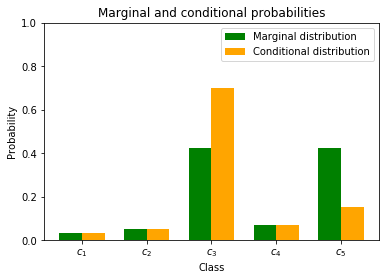

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

values, counts = np.unique(datas[0][target], return_counts=True)
marg = ax.bar(np.arange(5), counts/len(datas[0]), 0.35, color='green')
cond = ax.bar(np.arange(5) + 0.35, [0.03, 0.05, 0.7, 0.07, 0.15], 0.35, color='orange')
# ax.bar(np.arange(5), counts/len(data), 0.35, color='green')

ax.set_ylabel('Probability')
ax.set_xlabel('Class')
ax.set_title('Marginal and conditional probabilities')
ax.set_xticks(np.arange(5) + 0.35 / 2)
ax.set_xticklabels(('$c_1$', '$c_2$', '$c_3$', '$c_4$', '$c_5$'))
ax.set_ylim([0, 1])

ax.legend((marg, cond), ('Marginal distribution', 'Conditional distribution'))
plt.savefig('marg_cond')

plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
log = open('binary_wHiCS_log.txt', 'w')
for i, data in enumerate(datas):
    # Compensating HiCS
    #
    #
    values, counts = np.unique(data[target], return_counts=True)
    cost_matrix = pd.DataFrame(columns=values)
    for value, count in zip(values, counts):
        weighting = (len(data) / count)
        cost_matrix[value] = [weighting]
    cost_matrix = cost_matrix
    cost_matrix

    from hics.result_storage import DefaultResultStorage
    input_features = [ft for ft in data.columns.values if ft != target]
    storage = DefaultResultStorage(input_features)

    from hics.incremental_correlation import IncrementalCorrelation
    correlation = IncrementalCorrelation(data, target, storage,
                                         iterations=50, alpha=0.1,
                                         drop_discrete=False, cost_matrix=cost_matrix)

    correlation.update_bivariate_relevancies(runs=5)

    ranking = storage.get_relevancies().relevancy.sort_values(ascending=False)
    rank_columns = [tup[0] for tup in ranking.index.values]

    # Standard HiCS
    #
    #
    input_features = [ft for ft in data.columns.values if ft != target]
    storage_nocomp = DefaultResultStorage(input_features)
    correlation_nocomp = IncrementalCorrelation(data, target, storage_nocomp,
                                                iterations=50, alpha=0.1,
                                                drop_discrete=False, cost_matrix=None)

    correlation_nocomp.update_bivariate_relevancies(runs=5)

    ranking_nocomp = storage_nocomp.get_relevancies(
    ).relevancy.sort_values(ascending=False)
    rank_columns_nocomp = [tup[0] for tup in ranking_nocomp.index.values]

    # Train/Test split
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Test Classifier
    #
    #
    k = 10
    results_nocomp = []
    from sklearn.metrics import f1_score
    for j in range(100):
        clf = RandomForestClassifier()
        clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
        y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
        results_nocomp.append(
            f1_score(y_test, y_predict_ideal, average='macro'))

    results = []
    for j in range(100):
        clf_selected = RandomForestClassifier()
        clf_selected.fit(X_train[rank_columns[:k]], y_train)
        y_predict = clf_selected.predict(X_test[rank_columns[:k]])
        results.append(f1_score(y_test, y_predict, average='macro'))
    
    print('Dataset 1_whics_' + str(i+1), file=log)
    print('Weighted RaR macro-weighted F1: ' + str(np.mean(results)), file=log)
    print('Standard RaR macro-weighted F1: ' + str(np.mean(results_nocomp)), file=log)
    print('Difference weighted-standard: ' + str(np.mean(results) - np.mean(results_nocomp)), file=log)
    log.flush()

In [ ]:
a = [-0.0225936417272, -0.00476803114525, 0.0109319083848, 0.026694293321, 0.0625457112271, -0.0177717286078,
     0.0227507908857, -0.0169589501157, -0.0175758301641, -
     0.00305962928424, 0.00822239210185, 0.0428198518042,
     -0.00123140452899, 0.0556053875937, 0.00667366405978, 0.0353712522169, 0.00141332467134, -0.0109000827491,
     -0.00848682698711, -0.0012579205803]
np.mean(a)

In [8]:
import csrar
log = open('binary_wRaR_log_exp_1.4.txt', 'w')
for i, data in enumerate(datas):
    # Compensating RaR
    #
    #
    rar = csrar.rar.RaR(data)
    rar.run(target, k=5, runs=200, split_iterations=10, compensate_imbalance=True, weight_mod=1.4)

    # Standard RaR
    #
    #
    rar_nocomp = csrar.rar.RaR(data)
    rar_nocomp.run(target, k=5, runs=200, split_iterations=10, compensate_imbalance=False)

    # Train/Test split
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Test Classifier
    #
    #
    k = 15
    results_nocomp = []
    rank_columns_nocomp = [r[0] for r in rar_nocomp.feature_ranking]
    from sklearn.metrics import f1_score
    for j in range(25):
        clf = RandomForestClassifier()
        clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
        y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
        results_nocomp.append(f1_score(y_test, y_predict_ideal, average='macro'))

    results = []
    rank_columns = [r[0] for r in rar.feature_ranking]
    for j in range(25):
        clf_selected = RandomForestClassifier()
        clf_selected.fit(X_train[rank_columns[:k]], y_train)
        y_predict = clf_selected.predict(X_test[rank_columns[:k]])
        results.append(f1_score(y_test, y_predict, average='macro'))
    
    print('Dataset 2_wrar_' + str(i+1), file=log)
    print('Weighted RaR macro-weighted F1: ' + str(np.mean(results)), file=log)
    print('Standard RaR macro-weighted F1: ' + str(np.mean(results_nocomp)), file=log)
    print('Difference weighted-standard: ' + str(np.mean(results) - np.mean(results_nocomp)), file=log)
    log.flush()

Generated cost matrix:
          0.0       1.0      2.0        3.0       4.0
0  134.273491  66.28908  3.31326  41.386885  3.315444
Overall cost matrix:
          0.0       1.0      2.0        3.0       4.0
0  134.273491  66.28908  3.31326  41.386885  3.315444
Relevance: 100.00%    
Running optimizer...
Optimizer done.
{'75': 0.029453344436579296, '89': 0.07735858515624251, '48': 0.10470479310330288, '44': 0.18569334368868093, '79': 0.08064282417441075, '10': 5.889342202853092e-10, '25': 2.9337147338413296e-10, '54': 0.920517345674406, '92': 0.3167413102494271, '45': 0.02481611748913195, '46': 0.08928929325444109, '67': 0.24495214617723682, '74': 0.08313709999402444, '15': 2.905683867096474e-10, '82': 0.07756122563801839, '18': 5.911060378924893e-10, '47': 5.710543210541986e-10, '69': 0.05166361389528152, '71': 0.10757914157358303, '95': 0.07304802080479669, '19': 0.06802207078193939, '0': 0.5421994952542588, '49': 0.3148911551611262, '98': 0.0739372415347613, '52': 0.01737311514341602,

Redundancy: 100.00%    
1. 54 with a score of 0.9969004223049222
2. 77 with a score of 0.934082751289833
3. 6 with a score of 0.9303483930480055
4. 60 with a score of 0.7726398056770255
5. 14 with a score of 0.7604955060476822
6. 7 with a score of 0.7353835852445805
7. 84 with a score of 0.7161919462172546
8. 52 with a score of 0.7012914959212909
9. 50 with a score of 0.6712310393320763
10. 13 with a score of 0.6190401435019134
11. 0 with a score of 0.608195518099586
12. 39 with a score of 0.5667411799498204
13. 4 with a score of 0.5534231547640979
14. 17 with a score of 0.548667048284608
15. 93 with a score of 0.4617181255856982
16. 15 with a score of 0.4336160916018993
17. 61 with a score of 0.40073815152616105
18. 92 with a score of 0.3949243713625318
19. 76 with a score of 0.39064343912801364
20. 47 with a score of 0.3829584984407403
21. 87 with a score of 0.37128826614186894
22. 28 with a score of 0.3636026939184769
23. 72 with a score of 0.3479501275335539
24. 65 with a score of 

Relevance: 100.00%    
Running optimizer...
Optimizer done.
{'75': 0.8761096112335353, '89': 9.073726341596393e-11, '48': 0.4012624053334129, '44': 0.08880055241404898, '79': 0.39562494059240627, '10': 0.16364764050835892, '25': 0.2822605517815344, '54': 0.10579954695034846, '92': 0.25640246505774184, '45': 0.00901282403924276, '46': 0.2240332641722257, '67': 9.129402826063803e-11, '74': 0.5125587712637718, '15': 8.931181032137487e-11, '82': 0.2861480297333344, '18': 8.931902179105994e-11, '47': 0.30399234965190447, '69': 0.3207395328035446, '71': 0.15440635626893065, '95': 9.235178933198554e-11, '19': 0.545121240843292, '0': 0.3484206109534315, '49': 0.3039288015044192, '98': 0.3133645893350247, '52': 0.23210829304467967, '72': 0.1433263893109202, '1': 0.05229012438359211, '83': 0.32906668340559475, '29': 0.10323313237118714, '39': 0.0348785992439493, '22': 8.74374037480862e-11, '28': 0.1790622834676302, '53': 0.14737376527828291, '3': 0.21066721836501034, '91': 8.932228981916254e-11,

Redundancy: 100.00%    
1. 61 with a score of 0.9957318604067287
2. 40 with a score of 0.6848486126943887
3. 0 with a score of 0.5584763893821785
4. 94 with a score of 0.5100796861545054
5. 13 with a score of 0.49777900203022285
6. 41 with a score of 0.4936208896616518
7. 50 with a score of 0.46833773367832504
8. 81 with a score of 0.46526883917876083
9. 80 with a score of 0.43305049878626245
10. 45 with a score of 0.34989312385142096
11. 66 with a score of 0.29514922063274934
12. 4 with a score of 0.29137502215008276
13. 67 with a score of 0.236677418476966
14. 57 with a score of 0.23473945523860498
15. 72 with a score of 0.2040064973039635
16. 16 with a score of 0.1818082077044474
17. 11 with a score of 0.16262558092130175
18. 85 with a score of 0.15653452864380923
19. 27 with a score of 0.15399336752697113
20. 30 with a score of 0.15135152763162377
21. 59 with a score of 0.1500510883396928
22. 98 with a score of 0.14705024215337148
23. 39 with a score of 0.14513815644142067
24. 31 w

Generated cost matrix:
          0.0       1.0      2.0        3.0       4.0
0  134.273491  66.28908  3.31326  41.386885  3.315444
Overall cost matrix:
          0.0       1.0      2.0        3.0       4.0
0  134.273491  66.28908  3.31326  41.386885  3.315444
Relevance: 100.00%    
Running optimizer...
Optimizer done.
{'75': 0.5577210056726869, '89': 0.06106032459019323, '48': 1.2553156376256505e-11, '44': 0.11501371984150587, '79': 0.19138099662046643, '10': 0.20498937115138655, '25': 1.2517922470591225e-11, '54': 0.02283102060341248, '92': 0.1767100666372776, '45': 0.19865009395292374, '46': 0.06195689538835823, '67': 0.061956894948156344, '74': 0.12296542796294992, '15': 0.25238728958237255, '82': 1.2572351766060496e-11, '18': 0.8307789240906709, '47': 0.2829077724690662, '69': 0.13835696823248117, '71': 0.01976886352394491, '95': 0.03710181520402636, '19': 0.12301731156893961, '0': 1.2518391080663651e-11, '49': 0.224847120200499, '98': 0.2930377431579945, '52': 1.2590786708602585e-

Redundancy: 100.00%    
1. 38 with a score of 0.9958024542588019
2. 36 with a score of 0.9526490493849452
3. 6 with a score of 0.7683549075505839
4. 18 with a score of 0.7603045555283853
5. 50 with a score of 0.5365224195855663
6. 3 with a score of 0.46608231065199246
7. 15 with a score of 0.435914926462158
8. 61 with a score of 0.4214989019555652
9. 32 with a score of 0.410741743171527
10. 56 with a score of 0.41060240151597377
11. 92 with a score of 0.3666640586601552
12. 69 with a score of 0.36662877823075324
13. 11 with a score of 0.35599771644535044
14. 81 with a score of 0.3473889929160736
15. 73 with a score of 0.33065482139188235
16. 30 with a score of 0.32393300631923394
17. 63 with a score of 0.3157609869310291
18. 59 with a score of 0.314715935053414
19. 8 with a score of 0.3132377267017829
20. 47 with a score of 0.2864289876278901
21. 85 with a score of 0.2859742004181164
22. 75 with a score of 0.26082545303027854
23. 13 with a score of 0.2481328911630421
24. 27 with a scor

Relevance: 100.00%    
Running optimizer...
Optimizer done.
{'75': 1.0, '89': 0.08788192216498399, '48': 0.02879583817045524, '44': 0.1412384251971602, '79': 0.05182924649549028, '10': 0.02709968502689988, '25': 0.11218046561044015, '54': 0.7574038397471786, '92': 7.99970596823788e-12, '45': 7.749444975998885e-12, '46': 0.07537484142043535, '67': 0.08287728646116355, '74': 0.06205281326580977, '15': 0.4679912540116931, '82': 0.24038429974998693, '18': 0.5033795164855976, '47': 9.330951742784552e-10, '69': 0.23538436901323165, '71': 0.03416987981470788, '95': 0.08636839976581667, '19': 0.274711545352286, '0': 0.4801833188128717, '49': 0.10106719945028499, '98': 0.05639255646244048, '52': 0.06625119826644305, '72': 7.793102360173716e-12, '1': 0.0863683848785393, '83': 0.1937940643384495, '29': 0.07684362553591068, '39': 7.779115176730514e-12, '22': 0.08799361566530552, '28': 0.061422321952370004, '53': 0.34150142174875, '3': 0.3214394497567961, '91': 0.30756386006608016, '88': 0.50337950

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Generated cost matrix:
          0.0       1.0      2.0        3.0       4.0
0  134.273491  66.28908  3.31326  41.386885  3.315444
Overall cost matrix:
          0.0       1.0      2.0        3.0       4.0
0  134.273491  66.28908  3.31326  41.386885  3.315444
Relevance: 100.00%    
Running optimizer...
Optimizer done.
{'75': 0.4819856257555535, '89': 1.6541665583141462e-09, '48': 1.6649774609853475e-09, '44': 0.04710814490771539, '79': 3.309969504602048e-09, '10': 0.2534420939901746, '25': 0.15152927359020216, '54': 0.07819054314331701, '92': 1.6637169632971723e-09, '45': 3.351956879920787e-09, '46': 0.18672145276950194, '67': 1.653691330586694e-09, '74': 0.17021684624041392, '15': 3.3099909512508836e-09, '82': 0.1834319302641486, '18': 0.9723797546369641, '47': 0.4931502173972971, '69': 0.31528517864019523, '71': 0.16352997177227527, '95': 0.30784915439985727, '19': 0.5282417320516402, '0': 0.18195691476598883, '49': 0.09145983504329497, '98': 0.14702774455873202, '52': 0.017476811197

Redundancy: 100.00%    
1. 69 with a score of 0.9969809125467657
2. 38 with a score of 0.8749180203184808
3. 18 with a score of 0.8192734344962113
4. 7 with a score of 0.811603785801276
5. 91 with a score of 0.7984077507061005
6. 51 with a score of 0.7484866347089852
7. 75 with a score of 0.7385881168736721
8. 83 with a score of 0.7352338017289978
9. 3 with a score of 0.7351246948190359
10. 50 with a score of 0.7145756155190458
11. 47 with a score of 0.66839163754145
12. 10 with a score of 0.6576137540829231
13. 81 with a score of 0.6363384756783886
14. 66 with a score of 0.6201371264470619
15. 97 with a score of 0.5461398083805024
16. 1 with a score of 0.5271746112817864
17. 79 with a score of 0.47105030259380376
18. 40 with a score of 0.4695612123090455
19. 11 with a score of 0.46672471069341404
20. 28 with a score of 0.4319910406325639
21. 5 with a score of 0.39844750177972105
22. 17 with a score of 0.3901753917042141
23. 2 with a score of 0.3779654393668772
24. 9 with a score of 0.

Relevance: 100.00%    
Running optimizer...
Optimizer done.
{'75': 0.015342593753865251, '89': 0.01421106414327011, '48': 0.012315382318323088, '44': 0.038581291519252735, '79': 2.197441209313039e-11, '10': 0.14161270890157643, '25': 0.03724537921366029, '54': 2.0558443610714397e-11, '92': 0.030248798221761696, '45': 2.056016823640637e-11, '46': 0.058789217307971, '67': 2.0992046065583194e-11, '74': 0.004612807357657942, '15': 0.06390427825795343, '82': 0.1451197232656734, '18': 0.14511972200513032, '47': 0.21196570448032134, '69': 0.043531335856317875, '71': 0.022228407086134192, '95': 0.0027006851462217196, '19': 0.0026881512264949636, '0': 0.020500752004487824, '49': 2.0559049596650004e-11, '98': 0.02531043563265061, '52': 2.0767360020153067e-11, '72': 0.043309690628251324, '1': 0.04162482629526761, '83': 0.32680653304497564, '29': 0.0600781658054655, '39': 0.14161270912839832, '22': 0.03643475821587303, '28': 0.03856314923026125, '53': 2.0560830267583625e-11, '3': 0.185146065128649

Redundancy: 100.00%    
1. 90 with a score of 0.996185504918691
2. 72 with a score of 0.647455182144635
3. 71 with a score of 0.6085893151815988
4. 35 with a score of 0.6024418126762588
5. 49 with a score of 0.6010359898804801
6. 11 with a score of 0.5864513454782566
7. 87 with a score of 0.5503612248702656
8. 58 with a score of 0.46993643195145884
9. 66 with a score of 0.449980105732572
10. 18 with a score of 0.4417009739574838
11. 0 with a score of 0.42122635881599957
12. 19 with a score of 0.41887275779593947
13. 67 with a score of 0.4144701149824865
14. 96 with a score of 0.3668881014895188
15. 77 with a score of 0.3633231796025981
16. 85 with a score of 0.3598695030261109
17. 81 with a score of 0.3565990269706505
18. 78 with a score of 0.33719858721147417
19. 99 with a score of 0.3323512130446138
20. 38 with a score of 0.29584689533337355
21. 73 with a score of 0.287386304116091
22. 32 with a score of 0.2817102494901957
23. 10 with a score of 0.25778081716502294
24. 23 with a scor

Generated cost matrix:
          0.0       1.0      2.0        3.0       4.0
0  134.273491  66.28908  3.31326  41.386885  3.315444
Overall cost matrix:
          0.0       1.0      2.0        3.0       4.0
0  134.273491  66.28908  3.31326  41.386885  3.315444
Relevance: 100.00%    
Running optimizer...
Optimizer done.
{'75': 0.12123707298233376, '89': 2.4730365436443256e-09, '48': 0.16395460836004866, '44': 2.5663902952661016e-09, '79': 0.14171585050232605, '10': 0.8987789849209036, '25': 0.029295232679299437, '54': 0.11725225189076567, '92': 4.778978565572049e-09, '45': 0.436399726720854, '46': 1.2489731150788386e-09, '67': 2.462117726150709e-09, '74': 0.10259891731862034, '15': 1.2485824327471647e-09, '82': 1.6677827875882923e-09, '18': 0.02897928326050047, '47': 0.13719451234522267, '69': 0.15547377219552855, '71': 0.016261301343416502, '95': 0.009068365541224862, '19': 0.18207409531081462, '0': 0.4363995680824909, '49': 0.039388901761275526, '98': 0.16454584655331586, '52': 0.00012

Redundancy: 100.00%    
1. 10 with a score of 0.9980461900706378
2. 42 with a score of 0.9684773317692474
3. 24 with a score of 0.8075772250411836
4. 50 with a score of 0.8055002891773605
5. 16 with a score of 0.743988778211764
6. 2 with a score of 0.657473596790324
7. 8 with a score of 0.622557550601421
8. 15 with a score of 0.6205319285459198
9. 77 with a score of 0.5802871819695851
10. 64 with a score of 0.5298168121190518
11. 68 with a score of 0.5277404867352018
12. 3 with a score of 0.5273922571545597
13. 84 with a score of 0.5106341659162464
14. 38 with a score of 0.49034932067233733
15. 86 with a score of 0.4742467154069896
16. 0 with a score of 0.4207400100402825
17. 36 with a score of 0.4196822009470626
18. 85 with a score of 0.39545165540862953
19. 74 with a score of 0.3945892207916938
20. 79 with a score of 0.3834028095267514
21. 58 with a score of 0.37865537286382817
22. 23 with a score of 0.3781017368584709
23. 52 with a score of 0.37795032615375185
24. 76 with a score of

Relevance: 100.00%    
Running optimizer...
Optimizer done.
{'75': 0.3432272216542323, '89': 3.830401816187498e-10, '48': 0.10641542867221876, '44': 0.10467272886293551, '79': 0.05456062632152449, '10': 0.23336595236757382, '25': 4.0166340760127236e-10, '54': 0.11786594940895508, '92': 3.9180080734888156e-10, '45': 0.016997002463402487, '46': 0.14822883703129036, '67': 1.0, '74': 0.019624776328682467, '15': 0.057155053276153236, '82': 0.15184915896330708, '18': 0.10772421554352536, '47': 0.11529222657346327, '69': 0.4401783899716565, '71': 0.0634585594821621, '95': 0.09416620742821978, '19': 3.877532481784711e-10, '0': 0.37650710372629015, '49': 0.02553466193136225, '98': 0.0480137011677164, '52': 0.012001971431298272, '72': 0.0596757709831799, '1': 3.854896267481686e-10, '83': 0.15104671742305195, '29': 0.03899876311861299, '39': 3.868263773162284e-10, '22': 3.8305474846025235e-10, '28': 3.8305132328328336e-10, '53': 0.1097048432514045, '3': 3.830666989277125e-10, '91': 0.170541086176

In [ ]:
rar.correlation.result_storage.get_relevancies()

In [ ]:
set(rank_columns_nocomp[:10]).difference(set(rank_columns[:10]))

In [ ]:
k = 15
results_nocomp = []
rank_columns_nocomp = [r[0] for r in rar_nocomp.feature_ranking]
from sklearn.metrics import f1_score
for j in range(25):
    clf = RandomForestClassifier()
    clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
    y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
    results_nocomp.append(f1_score(y_test, y_predict_ideal, average='macro'))

results = []
rank_columns = [r[0] for r in rar.feature_ranking]
for j in range(25):
    clf_selected = RandomForestClassifier()
    clf_selected.fit(X_train[rank_columns[:k]], y_train)
    y_predict = clf_selected.predict(X_test[rank_columns[:k]])
    results.append(f1_score(y_test, y_predict, average='macro'))

print('Dataset 1_whics_' + str(i+1))#, file=log)
print('Weighted RaR macro-weighted F1: ' + str(np.mean(results)))#, file=log)
print('Standard RaR macro-weighted F1: ' + str(np.mean(results_nocomp)))#, file=log)
print('Difference weighted-standard: ' + str(np.mean(results) - np.mean(results_nocomp)))#, file=log)

## Cumulative Gain

In [ ]:
ideal_CG = [ground_truth.loc[0, ideal_ranking[:i].values].sum()
            for i in range(len(ideal_ranking))]
CG = [ground_truth.loc[0, [r for r in rank_columns[:i]]].sum()
      for i in range(len(rank_columns))]
nocomp_CG = [ground_truth.loc[0, [r for r in rank_columns_nocomp[:i]]].sum()
             for i in range(len(rank_columns_nocomp))]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(CG, label='Cumulative Gain Compensating HiCS')
plt.plot(nocomp_CG, label='Cumulative Gain Standard HiCS')
plt.plot(ideal_CG, label='Ideal gain')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
# plt.savefig('HiCS_test7_comp_imb2_CG_weightmod1-8')
plt.show()

## Rankings

In [ ]:
rank_columns_nocomp

In [ ]:
rank_columns

In [ ]:
ideal_ranking